# What is mean by outliers?

An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data. Wikipedia defines it as 'an observation point that is distant from other observations.


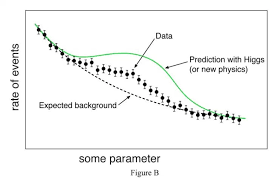


# Various ways of finding the outlier.

<b>1] scatterplot </b>

<b>2] Box plot</b>

<b>3] Using z score</b>

<b>4] Using the IQR interquantile range</b>

#  Scatterplot
If there is a regression line on a scatter plot, you can identify outliers. An outlier for a scatter plot is the point or points that are farthest from the regression line.If one point of a scatter plot is farther from the regression line than some other point, then the scatter plot has at least one outlie

#  Box plots
Box plots are a visual method to identify outliers. Box plots is one of the many ways to visualize data distribution. Box plot plots the q1 (25th percentile), q2 (50th percentile or median) and q3 (75th percentile) of the data along with (q1–1.5*(q3-q1)) and (q3+1.5*(q3-q1)).

#  Z-score method

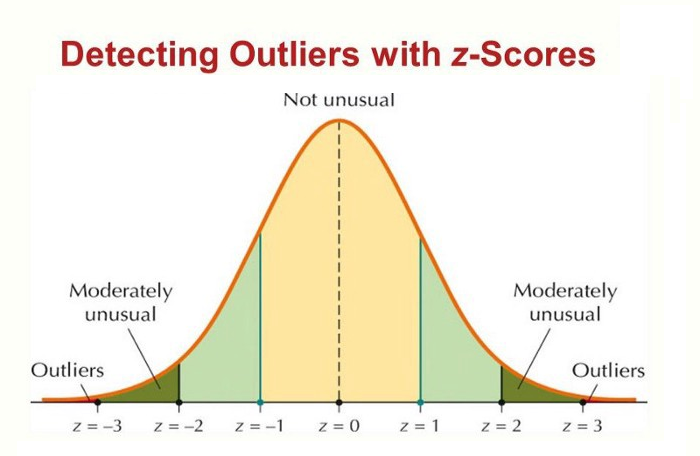

Z-score method is another method for detecting outliers. This method is generally used when a variable’ distribution looks close to Gaussian. Z-score is the number of standard deviations a value of a variable is away from the variable’ mean.

Z-Score = (X-mean) / Standard deviation

when the values of a variable are converted to Z-scores, then the distribution of the variable is called standard normal distribution with mean=0 and standard deviation=1. The Z-score method requires a cut-off specified by the user, to identify outliers. The widely used lower end cut-off is -3 and the upper end cut-off is +3. The reason behind using these cut-offs is, 99.7% of the values lie between -3 and +3 in a standard normal distribution. 

A normal distribution is shown below and it is estimated that

68% of the data points lie between +/- 1 standard deviation.

95% of the data points lie between +/- 2 standard deviation

99.7% of the data points lie between +/- 3 standard deviation


# InterQuantile Range


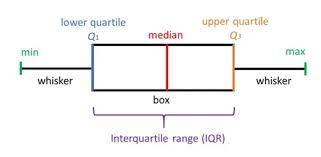

Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

Remember that percentiles can be calculated by sorting the observations and selecting values at specific indices. The 50th percentile is the middle value, or the average of the two middle values for an even number of examples. If we had 10,000 samples, then the 50th percentile would be the average of the 5000th and 5001st values.

We refer to the percentiles as quartiles (“quart” meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values.

The IQR defines the middle 50% of the data, or the body of the data.





<b>Steps</b>
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4.Find lower bound q1*1.5
5.Find upper bound q3*1.5

Anything that lies outside of lower and upper bound is an outlier

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

# Dataset:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [10]:
df = pd.read_csv('C:/Users/deshm/Desktop/dataml/wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Detecting outlier using scatterplot


<AxesSubplot:ylabel='fixed acidity'>

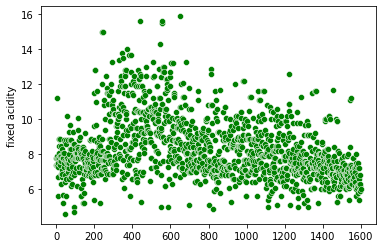

In [109]:
sns.scatterplot(x = np.arange(len(df['fixed acidity'])), y = df['fixed acidity'], legend=False, color = 'green')

<AxesSubplot:ylabel='volatile acidity'>

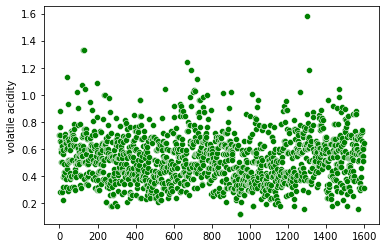

In [110]:
sns.scatterplot(x = np.arange(len(df['volatile acidity'])), y = df['volatile acidity'], legend=False, color = 'green')

# Detecting outlier using Box Plot

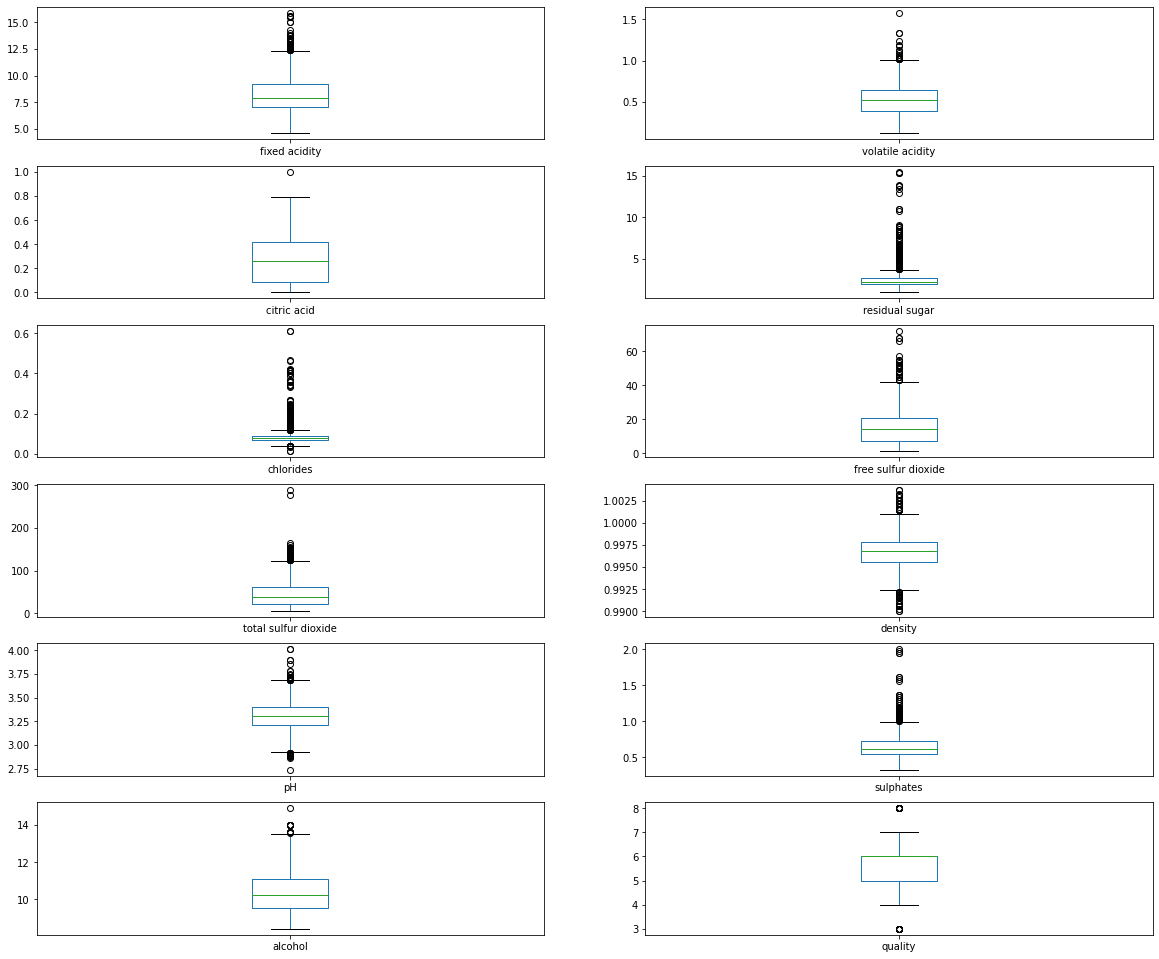

In [19]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(20,20));

# Detecting outlier using Z Score



<b>Formula for Z score</b>

Z Score= (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [26]:
v=df.columns
v

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [74]:
outlier_pt = detect_outliers(df['fixed acidity'])
outlier_pt   



[15.0,
 15.0,
 13.8,
 14.0,
 13.7,
 13.7,
 15.6,
 14.3,
 15.5,
 15.5,
 15.6,
 15.9,
 1.13,
 1.07,
 1.33,
 1.33,
 1.09,
 1.24,
 1.185,
 1.115,
 1.58,
 1.18,
 1.0,
 10.7,
 7.3,
 7.2,
 7.0,
 11.0,
 11.0,
 7.9,
 7.9,
 15.5,
 8.3,
 7.9,
 8.6,
 7.5,
 9.0,
 8.8,
 8.8,
 8.9,
 8.1,
 8.1,
 8.3,
 8.3,
 7.8,
 12.9,
 13.4,
 15.4,
 15.4,
 13.8,
 13.8,
 13.9,
 7.8,
 0.368,
 0.341,
 0.332,
 0.4639999999999999,
 0.401,
 0.467,
 0.236,
 0.61,
 0.36,
 0.27,
 0.337,
 0.263,
 0.611,
 0.358,
 0.3429999999999999,
 0.413,
 0.25,
 0.422,
 0.387,
 0.415,
 0.243,
 0.241,
 0.414,
 0.369,
 0.4029999999999999,
 0.414,
 0.415,
 0.415,
 0.267,
 0.235,
 0.23,
 52.0,
 51.0,
 50.0,
 68.0,
 68.0,
 54.0,
 53.0,
 52.0,
 51.0,
 57.0,
 50.0,
 48.0,
 48.0,
 72.0,
 51.0,
 51.0,
 52.0,
 55.0,
 55.0,
 48.0,
 48.0,
 66.0,
 148.0,
 153.0,
 165.0,
 151.0,
 149.0,
 147.0,
 148.0,
 155.0,
 151.0,
 152.0,
 278.0,
 289.0,
 160.0,
 147.0,
 147.0,
 1.0032,
 1.0026,
 1.00315,
 1.00315,
 1.00315,
 1.0026,
 0.99064,
 0.99064,
 1.00289,
 0.9

# Detecting outlier using InterQuantile Range


Steps:

1. Arrange the data in increasing order

2. Calculate first(q1) and third quartile(q3)

3. Find interquartile range (q3-q1)

4. Find lower bound q1*1.5

5. Find upper bound q3*1.5

Anything that lies outside of lower and upper bound is an outlier

In [98]:
sorted(df['citric acid'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01

In [103]:
quantile1, quantile3= np.percentile(df['residual sugar'],[25,75])

print(quantile1,quantile3)


1.9 2.6


In [104]:
iqr=quantile3-quantile1
print(iqr_value)

8.31


In [105]:
lower_bound_val = quantile1 -(1.5 * iqr) 
upper_bound_val = quantile3 +(1.5 * iqr)

In [106]:
print(lower_bound_val,upper_bound_val)

0.8499999999999996 3.6500000000000004
